In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=pd.read_csv('housing.csv')
df=df.drop(['longitude','latitude','ocean_proximity'],axis=1)
# Drop rows with missing values
df=df.dropna()
df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


<Axes: xlabel='households', ylabel='Density'>

<Axes: xlabel='households', ylabel='Density'>

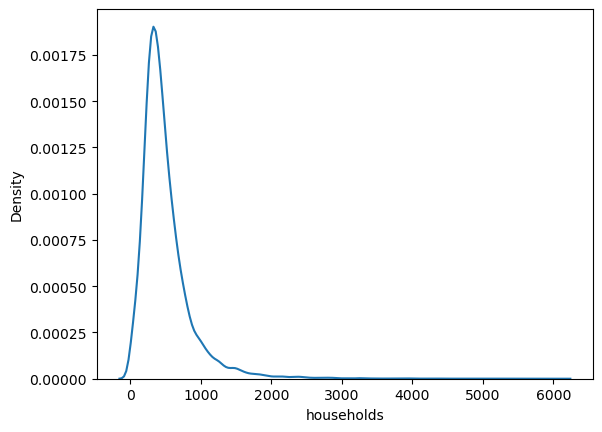

In [23]:
sns.kdeplot(df['households'])

<Axes: xlabel='median_house_value', ylabel='Density'>

<Axes: xlabel='median_house_value', ylabel='Density'>

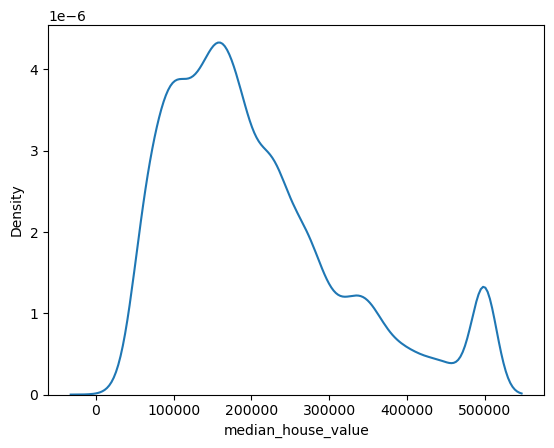

In [24]:
sns.kdeplot(df['median_house_value'])

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('median_house_value',axis=1),
                                               df['median_house_value'],test_size=0.3,random_state=0)
X_train

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
9856,20.0,6332.0,991.0,2668.0,955.0,5.7578
11070,17.0,2830.0,502.0,1370.0,459.0,5.1785
3745,34.0,2638.0,580.0,1150.0,551.0,4.2989
14041,27.0,1551.0,464.0,880.0,400.0,2.4167
5502,19.0,8324.0,1590.0,2927.0,1538.0,7.5426
...,...,...,...,...,...,...
13246,4.0,4323.0,775.0,1479.0,663.0,6.0758
19844,17.0,877.0,219.0,966.0,218.0,2.0000
9944,23.0,2840.0,491.0,1586.0,466.0,4.0337
10908,9.0,525.0,171.0,1257.0,165.0,3.3750


In [26]:
X_test

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14185,37.0,2176.0,418.0,1301.0,375.0,2.8750
6125,20.0,3158.0,684.0,2396.0,713.0,3.5250
14095,11.0,2393.0,726.0,1905.0,711.0,1.3448
14359,52.0,1260.0,202.0,555.0,209.0,7.2758
18004,32.0,2930.0,481.0,1336.0,481.0,6.4631
...,...,...,...,...,...,...
20450,6.0,6106.0,1134.0,3246.0,1062.0,5.2206
14681,15.0,4138.0,636.0,2001.0,677.0,4.8419
2639,17.0,2985.0,610.0,1544.0,584.0,2.1780
2935,15.0,1482.0,338.0,1059.0,279.0,1.2617


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)

X_trained_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [28]:
X_trained_scaled=pd.DataFrame(X_trained_scaled,columns=X_train.columns)
X_testd_scaled=pd.DataFrame(X_test_scaled,columns=X_train.columns)

In [29]:
X_trained_scaled

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.372549,0.160995,0.153631,0.074642,0.156882,0.362609
1,0.313725,0.071926,0.077747,0.038260,0.075317,0.322658
2,0.647059,0.067043,0.089851,0.032094,0.090446,0.261996
3,0.509804,0.039397,0.071850,0.024526,0.065614,0.132191
4,0.352941,0.211659,0.246586,0.081902,0.252754,0.485697
...,...,...,...,...,...,...
14298,0.058824,0.109899,0.120112,0.041315,0.108864,0.384540
14299,0.313725,0.022254,0.033830,0.026936,0.035685,0.103454
14300,0.431373,0.072181,0.076040,0.044314,0.076468,0.243707
14301,0.156863,0.013302,0.026381,0.035093,0.026969,0.198280


In [30]:
np.round(X_trained_scaled.describe(),1)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,14303.0,14303.0,14303.0,14303.0,14303.0,14303.0
mean,0.5,0.1,0.1,0.0,0.1,0.2
std,0.2,0.1,0.1,0.0,0.1,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.3,0.0,0.0,0.0,0.0,0.1
50%,0.5,0.1,0.1,0.0,0.1,0.2
75%,0.7,0.1,0.1,0.0,0.1,0.3
max,1.0,1.0,1.0,1.0,1.0,1.0


In [34]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr_scaled=LinearRegression()

In [36]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_trained_scaled,y_train)

LinearRegression()

In [37]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

c:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
y_pred

array([161409.37988273, 171542.96642977,  85861.81297558, ...,
       110993.42615308,  45763.90881428, 201997.60172053])

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
print("R2 Score before scaling:", r2_score(y_test, y_pred))
print("R2 Score before scaling:", r2_score(y_test, y_pred_scaled))

R2 Score before scaling: 0.5722987415644862
R2 Score before scaling: 0.5722987415644863
